In [1]:
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical

In [2]:
#load and preprocess image data (colour images) rgb
from keras.datasets import cifar10


In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

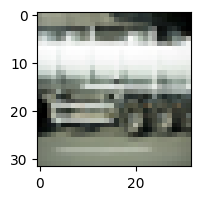

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(x_train[2551])

In [7]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [8]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

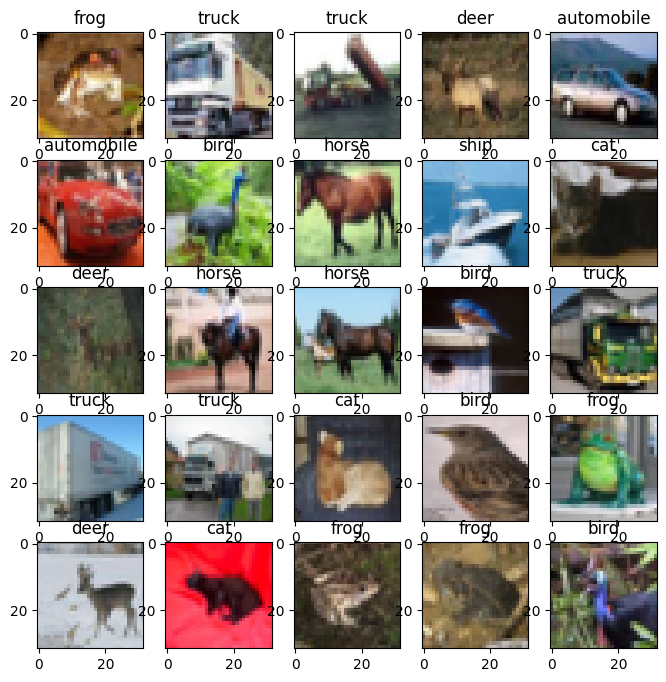

In [9]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.title(labels[y_train[i][0]])
    plt.imshow(x_train[i])


In [10]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [11]:
# convert y in onehot form

y_train_new = to_categorical(y_train)
y_test_new = to_categorical(y_test)

In [34]:
#define network architeutre using keras
#create the object of neural network
model = Sequential()

model.add(Input(shape=(32,32, 3)))


#first convolution
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
# pooling layer 1
model.add(MaxPool2D(pool_size=(2,2)))


#second convolution
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
# pooling layer 2
model.add(MaxPool2D(pool_size=(2,2)))

#third convolution
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
# pooling layer 3
model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))



# add flatten layer
model.add(Flatten())


#add hidden layer
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))


#add output layer
model.add(Dense(units=10, activation='softmax'))

In [35]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_37 (Conv2D)              │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 12, 12, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 4, 4, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,778 (409.29 KB)

 Trainable params: 104,778 (409.29 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
model.fit(x_train, y_train_new, epochs=20, batch_size=10)

Epoch 1/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.6770 - loss: 0.9251
Epoch 2/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.6752 - loss: 0.9391
Epoch 3/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.6828 - loss: 0.9300
Epoch 4/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.6419 - loss: 1.0452
Epoch 5/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.6895 - loss: 0.8980
Epoch 6/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.6990 - loss: 0.8682
Epoch 7/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.6981 - loss: 0.8864
Epoch 8/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.7074 - loss: 0.8553
Epoch 9/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.6758 - loss: 0.9371
Epoch 10/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.7083 - loss: 0.8579
Epoch 11/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.7112 - loss: 0.8459
Epoch 12/20
5000/50

In [ ]:
model.fit(x_train, y_train_new, epochs=20, batch_size=10)

In [40]:
model.evaluate(x_test, y_test_new, batch_size=1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.6330 - loss: 1.1471


[1.1521626710891724, 0.6389999985694885]